In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
ds = pd.read_csv('Date and model wise sale.csv')
print ("data shape :", ds.shape, "\n")
print(ds.info(), "\n")
print(ds)

data shape : (46116, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None 

            Date Model  Count
0      31-Aug-16   M45      5
1      31-Aug-16  M121      3
2      31-Aug-16  M122      4
3      31-Aug-16   M91     10
4      31-Aug-16   M66     57
...          ...   ...    ...
46111  01-Jan-14   M74      1
46112  01-Jan-14   M59      1
46113  01-Jan-14   M60      5
46114  01-Jan-14   M54      1
46115  01-Jan-14   M58      1

[46116 rows x 3 columns]


In [3]:
ds['Date'] = pd.to_datetime(ds['Date'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


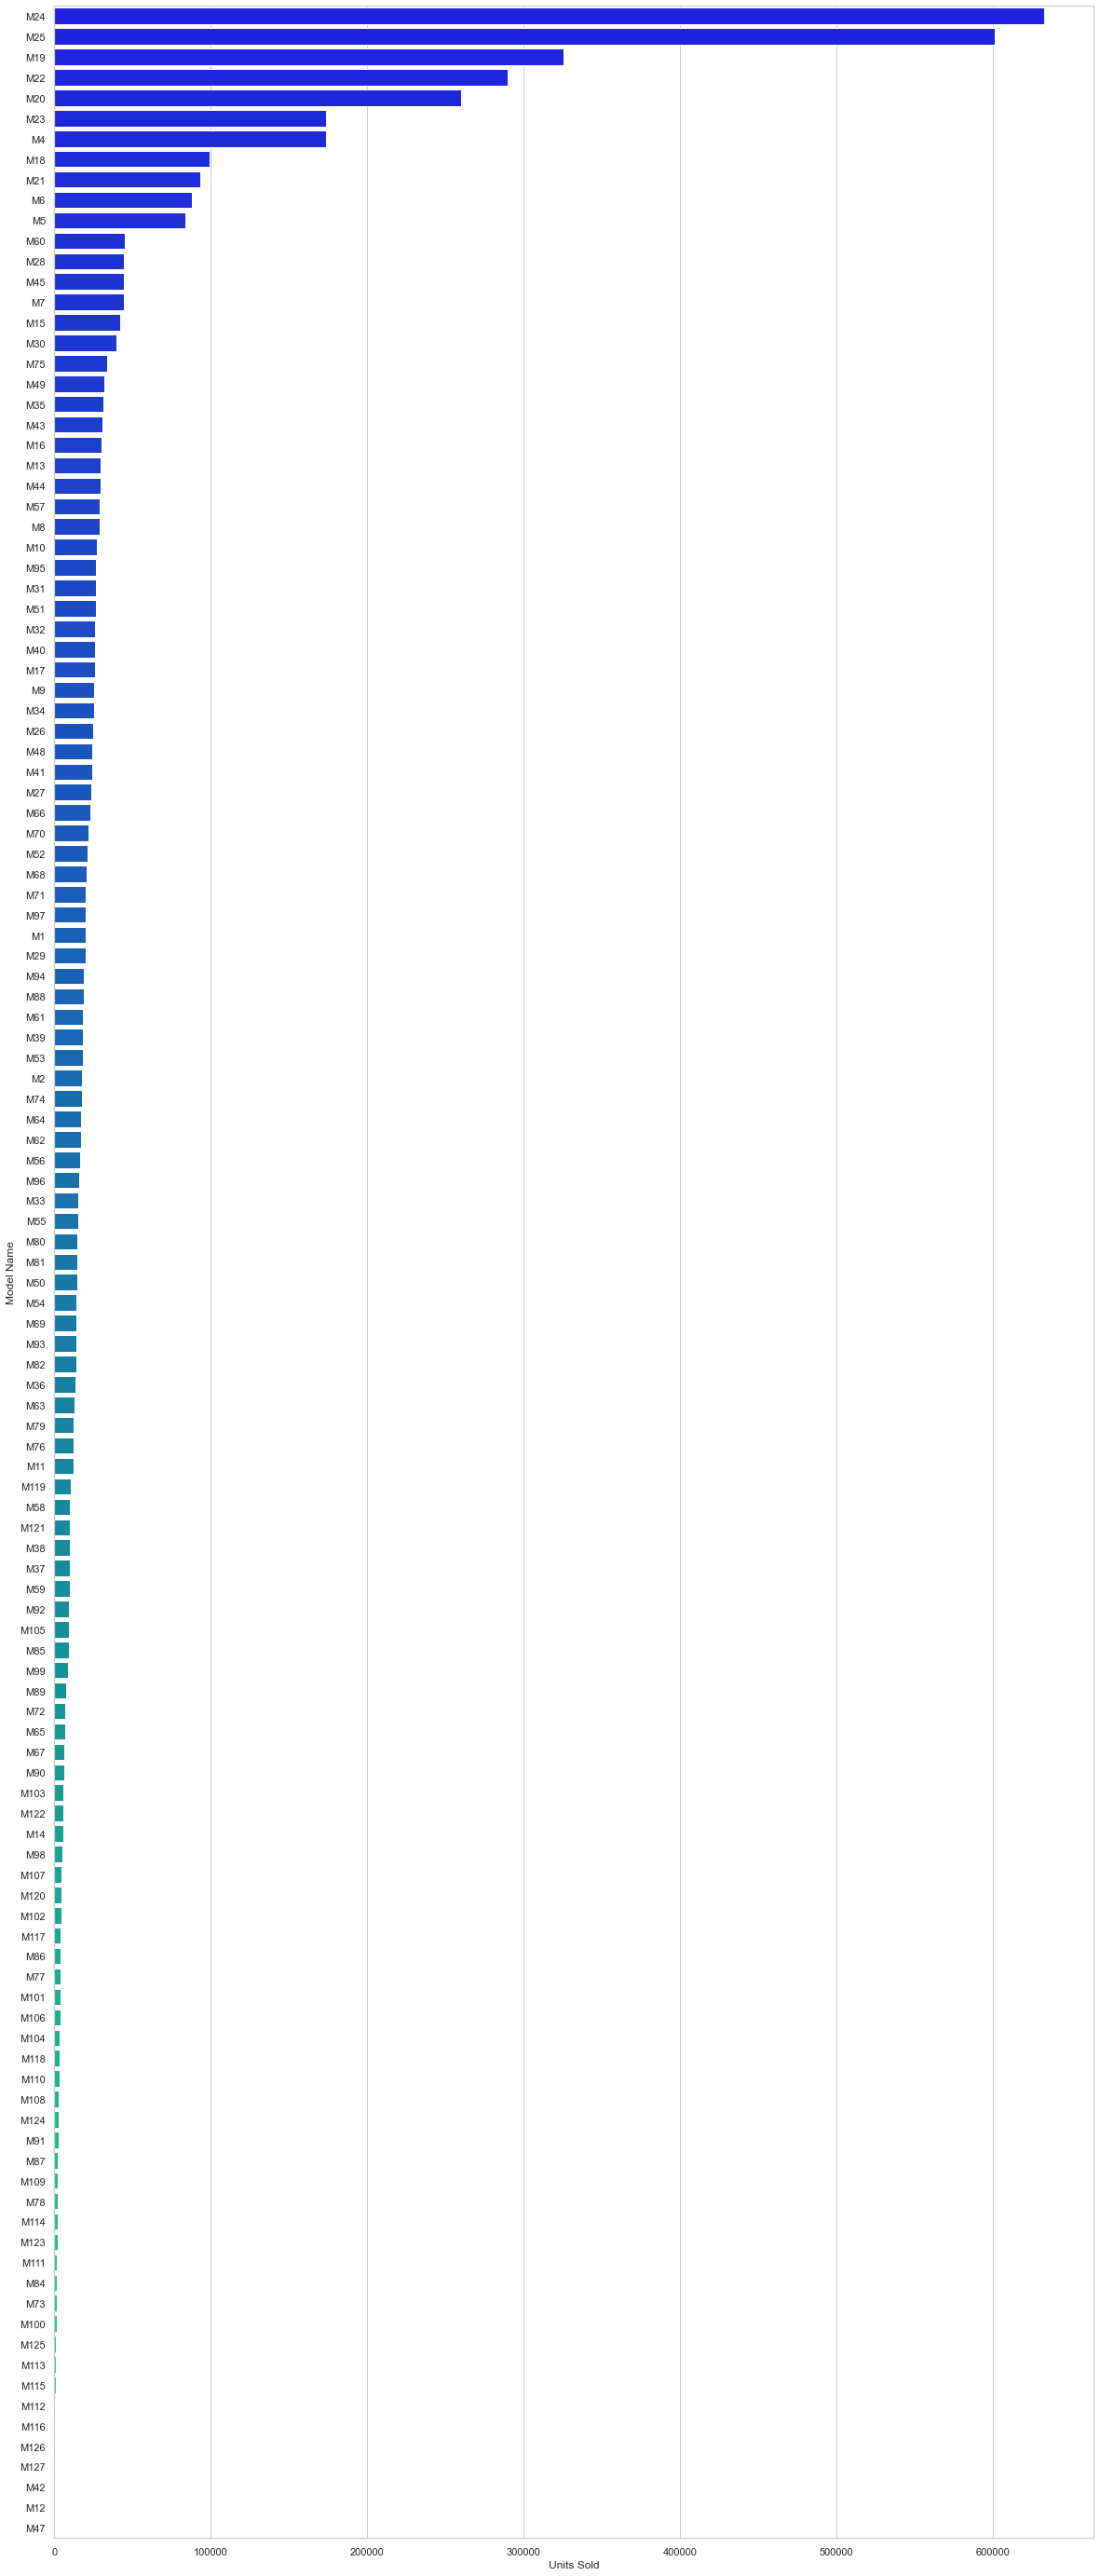

In [4]:
total_units_sold = ds.groupby('Model')['Count'].apply(lambda x: x.sum())
total_units_sold.sort_values(ascending = False, inplace = True)

sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize = (20, 50))
ax = sns.barplot(x = total_units_sold, y = total_units_sold.index, orient = 'h', palette = 'winter')
ax.set(xlabel = 'Units Sold', ylabel = 'Model Name')
plt.show()

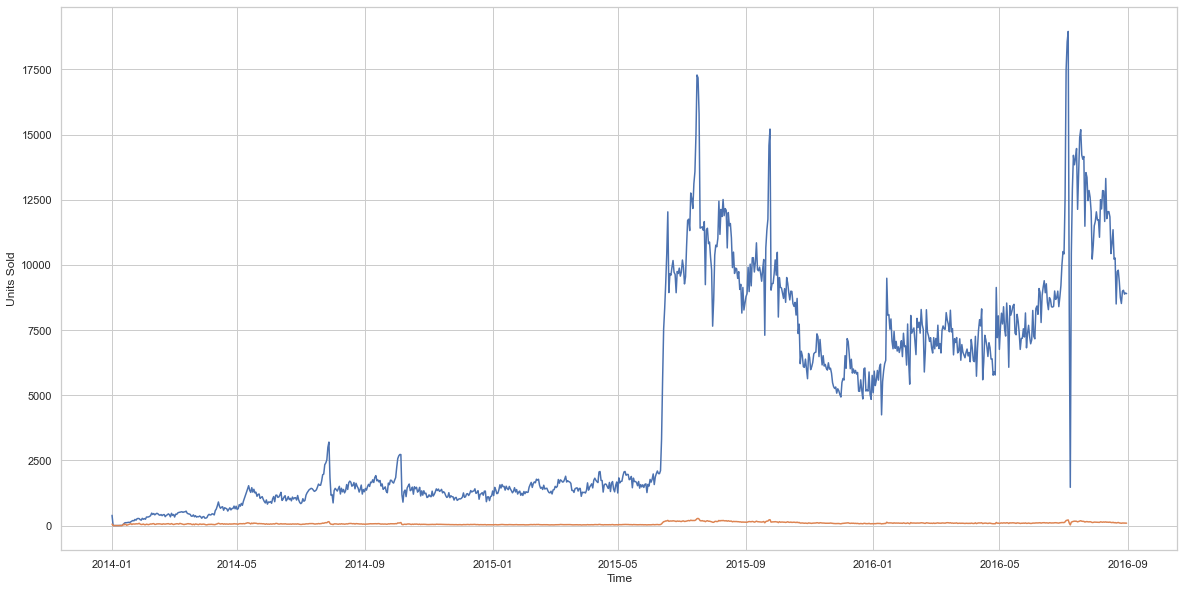

In [5]:
gp_time = ds.groupby('Date')['Count'].apply(lambda x: x.sum())
gp_time_mean = ds.groupby('Date')['Count'].apply(lambda x: x.mean())

plt.figure(figsize=(20, 10))
plt.ylabel('Units Sold')
plt.xlabel('Time')
plt.plot(gp_time.index, gp_time)
plt.plot(gp_time_mean.index, gp_time_mean)
plt.show()


In [6]:
gds = ds.groupby('Model')

for Model, Model_df in gds:
    print(Model)
    print(Model_df)

M1
            Date Model  Count
75    2016-08-31    M1      1
182   2016-08-30    M1      2
189   2016-08-29    M1      1
660   2016-08-24    M1      1
783   2016-08-23    M1      2
...          ...   ...    ...
43270 2014-08-22    M1      1
43290 2014-08-21    M1      2
43304 2014-08-20    M1      2
44091 2014-07-14    M1      1
45231 2014-05-05    M1      1

[668 rows x 3 columns]
M10
            Date Model  Count
45    2016-08-31   M10     54
168   2016-08-30   M10     51
220   2016-08-29   M10     81
278   2016-08-28   M10     66
386   2016-08-27   M10     61
...          ...   ...    ...
32950 2015-06-03   M10      1
33629 2015-05-20   M10      1
34010 2015-05-12   M10      1
36836 2015-03-11   M10      1
38061 2015-02-11   M10      1

[447 rows x 3 columns]
M100
           Date Model  Count
5    2016-08-31  M100     59
181  2016-08-30  M100     43
245  2016-08-29  M100     42
282  2016-08-28  M100     47
455  2016-08-27  M100     49
487  2016-08-26  M100     32
606  2016-08-25  

In [7]:
M = []

for i in range(0, 128):
    if(i != 0 and i != 3 and i != 46 and i != 83):
        Model_Name = "M" + str(i)
        print(Model_Name)
        M.append(gds.get_group(Model_Name))
    
    else:
        M.append(None)
    

M1
M2
M4
M5
M6
M7
M8
M9
M10
M11
M12
M13
M14
M15
M16
M17
M18
M19
M20
M21
M22
M23
M24
M25
M26
M27
M28
M29
M30
M31
M32
M33
M34
M35
M36
M37
M38
M39
M40
M41
M42
M43
M44
M45
M47
M48
M49
M50
M51
M52
M53
M54
M55
M56
M57
M58
M59
M60
M61
M62
M63
M64
M65
M66
M67
M68
M69
M70
M71
M72
M73
M74
M75
M76
M77
M78
M79
M80
M81
M82
M84
M85
M86
M87
M88
M89
M90
M91
M92
M93
M94
M95
M96
M97
M98
M99
M100
M101
M102
M103
M104
M105
M106
M107
M108
M109
M110
M111
M112
M113
M114
M115
M116
M117
M118
M119
M120
M121
M122
M123
M124
M125
M126
M127


In [8]:
print(M)

[None,             Date Model  Count
75    2016-08-31    M1      1
182   2016-08-30    M1      2
189   2016-08-29    M1      1
660   2016-08-24    M1      1
783   2016-08-23    M1      2
...          ...   ...    ...
43270 2014-08-22    M1      1
43290 2014-08-21    M1      2
43304 2014-08-20    M1      2
44091 2014-07-14    M1      1
45231 2014-05-05    M1      1

[668 rows x 3 columns],             Date Model  Count
50    2016-08-31    M2      4
116   2016-08-30    M2      4
195   2016-08-29    M2      5
321   2016-08-28    M2      2
374   2016-08-27    M2      3
...          ...   ...    ...
33939 2015-05-13    M2      3
34230 2015-05-07    M2      1
35155 2015-04-17    M2      1
38461 2015-02-01    M2      1
39098 2015-01-15    M2      1

[481 rows x 3 columns], None,             Date Model  Count
58    2016-08-31    M4    225
153   2016-08-30    M4    245
275   2016-08-29    M4    253
301   2016-08-28    M4    206
406   2016-08-27    M4    248
...          ...   ...    ...
19936 2

In [9]:
print(M[0])
print(M[3])
print(M[46])
print(M[83])

None
None
None
None


In [10]:
print(M[9])

            Date Model  Count
86    2016-08-31    M9     13
113   2016-08-30    M9     11
203   2016-08-29    M9     10
358   2016-08-28    M9      9
419   2016-08-27    M9      8
...          ...   ...    ...
31878 2015-06-24    M9     49
31931 2015-06-23    M9     13
31958 2015-06-22    M9      4
31999 2015-06-21    M9     11
35373 2015-04-12    M9      1

[439 rows x 3 columns]


In [11]:
M_Total = []

for i in range(0, 128):
    if(i != 0 and i != 3 and i != 46 and i != 83):
        M_Total.append(M[i]['Count'].sum())
        
        Model_Name = "M" + str(i)
        print(Model_Name, "=", M_Total[i], "units")
    
    else:
        M_Total.append(None)

M1 = 20211 units
M2 = 17500 units
M4 = 173411 units
M5 = 83762 units
M6 = 87664 units
M7 = 44129 units
M8 = 28666 units
M9 = 25274 units
M10 = 26849 units
M11 = 12317 units
M12 = 4 units
M13 = 29714 units
M14 = 5513 units
M15 = 42098 units
M16 = 30129 units
M17 = 25719 units
M18 = 99304 units
M19 = 325701 units
M20 = 259690 units
M21 = 93478 units
M22 = 289524 units
M23 = 173706 units
M24 = 632968 units
M25 = 601395 units
M26 = 24831 units
M27 = 23261 units
M28 = 44519 units
M29 = 20166 units
M30 = 39420 units
M31 = 26496 units
M32 = 26067 units
M33 = 15025 units
M34 = 25135 units
M35 = 31375 units
M36 = 13706 units
M37 = 9719 units
M38 = 9803 units
M39 = 18021 units
M40 = 26006 units
M41 = 23906 units
M42 = 17 units
M43 = 30679 units
M44 = 29423 units
M45 = 44191 units
M47 = 3 units
M48 = 23948 units
M49 = 31649 units
M50 = 14570 units
M51 = 26446 units
M52 = 21046 units
M53 = 17904 units
M54 = 14030 units
M55 = 14951 units
M56 = 16523 units
M57 = 28801 units
M58 = 10046 units
M59 = 9

In [12]:
M_Mean = []

for i in range(0, 128):
    if(i != 0 and i != 3 and i != 46 and i != 83):
        M_Mean.append(M[i]['Count'].mean())
        
        Model_Name = "M" + str(i)
#         print(Model_Name, "=", M_Mean[i], "units")
        print(f"Mean of {Model_Name} = {M_Mean[i]:.3f}")
    
    else:
        M_Mean.append(None)

Mean of M1 = 30.256
Mean of M2 = 36.383
Mean of M4 = 674.751
Mean of M5 = 192.115
Mean of M6 = 195.679
Mean of M7 = 97.847
Mean of M8 = 105.004
Mean of M9 = 57.572
Mean of M10 = 60.065
Mean of M11 = 143.221
Mean of M12 = 4.000
Mean of M13 = 69.263
Mean of M14 = 424.077
Mean of M15 = 114.397
Mean of M16 = 338.528
Mean of M17 = 60.091
Mean of M18 = 2837.257
Mean of M19 = 804.200
Mean of M20 = 633.390
Mean of M21 = 229.113
Mean of M22 = 1158.096
Mean of M23 = 2801.710
Mean of M24 = 1388.088
Mean of M25 = 1304.544
Mean of M26 = 38.026
Mean of M27 = 39.762
Mean of M28 = 107.275
Mean of M29 = 34.590
Mean of M30 = 67.732
Mean of M31 = 73.396
Mean of M32 = 105.534
Mean of M33 = 30.292
Mean of M34 = 42.892
Mean of M35 = 45.603
Mean of M36 = 29.286
Mean of M37 = 22.761
Mean of M38 = 29.438
Mean of M39 = 64.132
Mean of M40 = 114.061
Mean of M41 = 129.222
Mean of M42 = 8.500
Mean of M43 = 41.015
Mean of M44 = 44.179
Mean of M45 = 97.984
Mean of M47 = 3.000
Mean of M48 = 52.174
Mean of M49 = 51.799

In [13]:
Top5_TV = total_units_sold.head(5)
print(Top5_TV)
print(Top5_TV.index)

Model
M24    632968
M25    601395
M19    325701
M22    289524
M20    259690
Name: Count, dtype: int64
Index(['M24', 'M25', 'M19', 'M22', 'M20'], dtype='object', name='Model')


In [14]:
print(M[1].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 75 to 45231
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    668 non-null    datetime64[ns]
 1   Model   668 non-null    object        
 2   Count   668 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.9+ KB
None


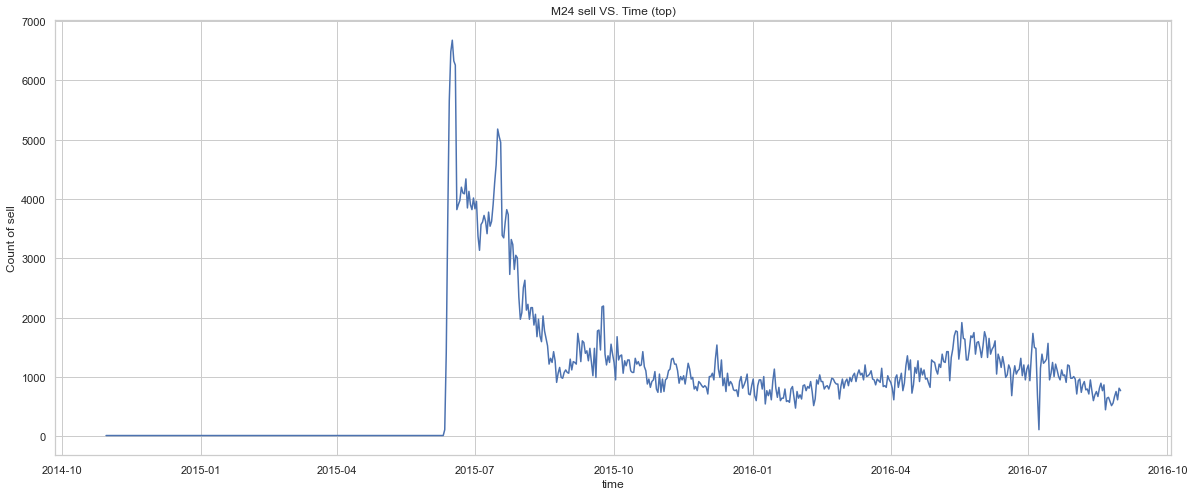

In [15]:
plt.figure(figsize=(20,8))
plt.title('M24 sell VS. Time (top)')
plt.ylabel('Count of sell')
plt.xlabel('time')
plt.plot(pd.to_datetime(M[24]['Date']), M[24]['Count'])
plt.show()


M24


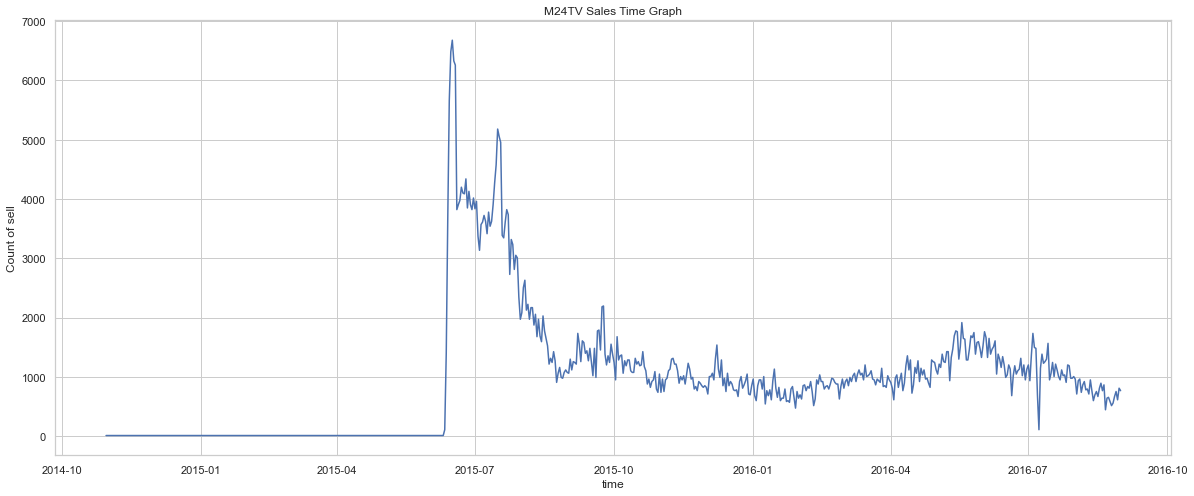

M25


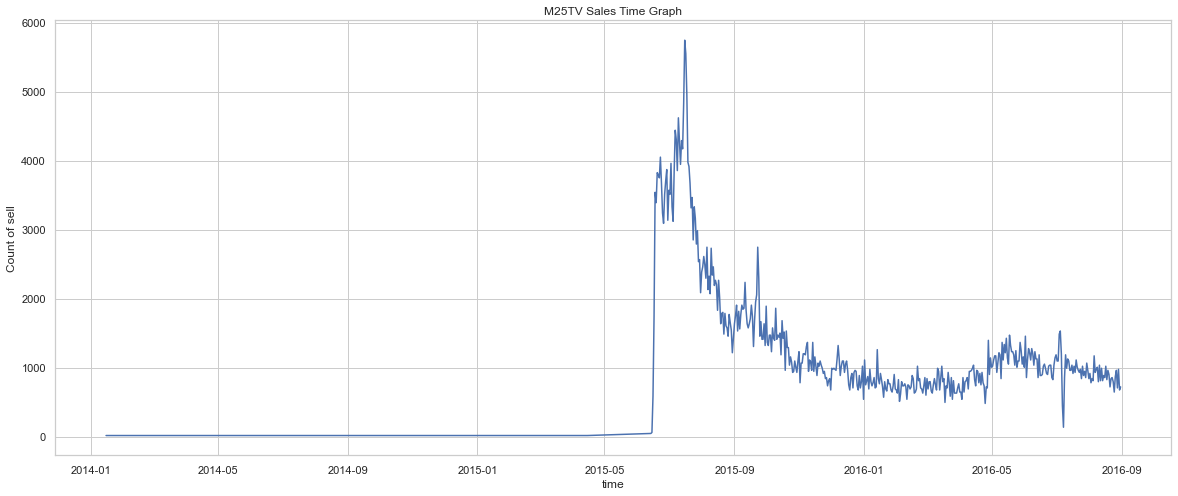

M19


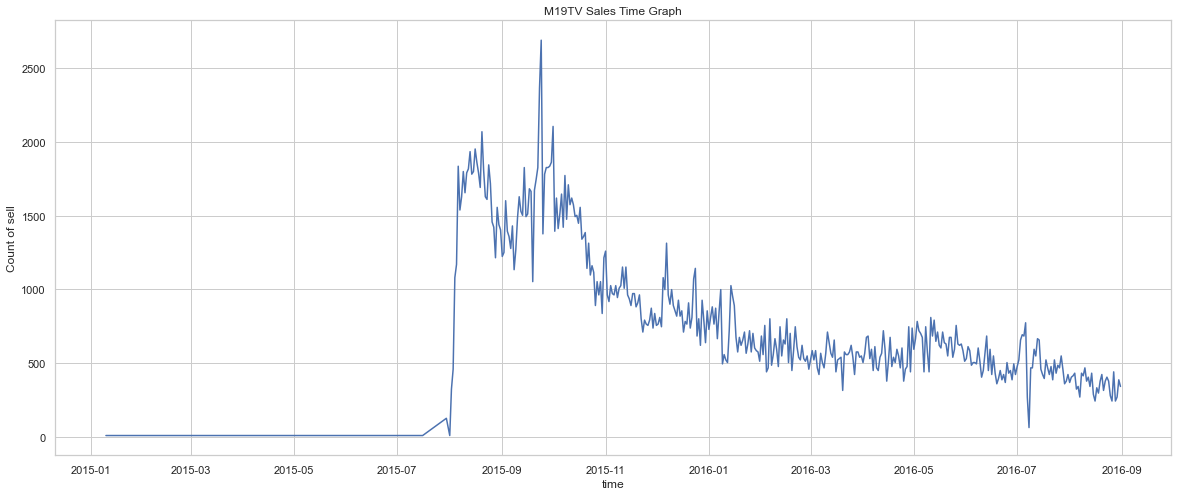

M22


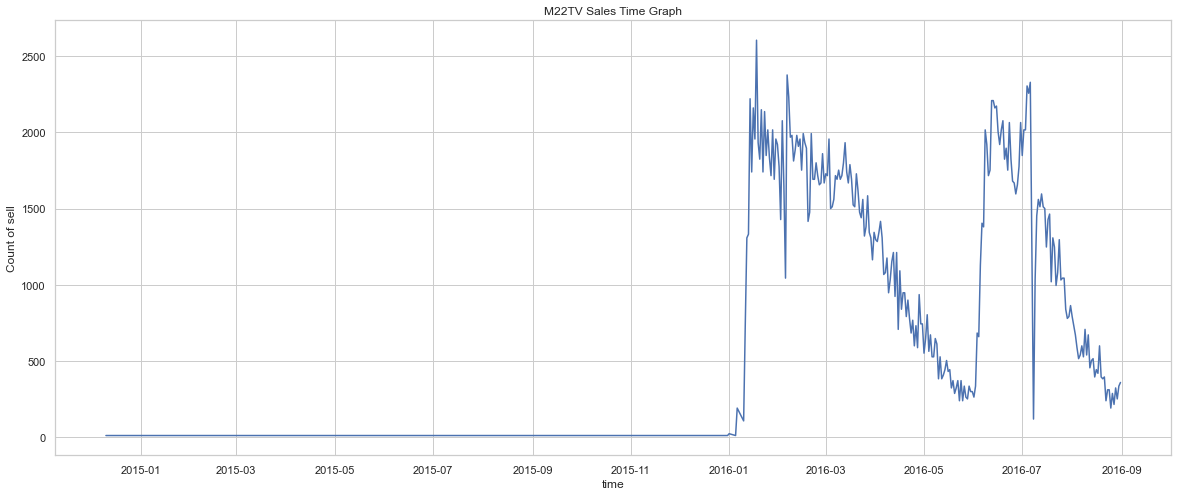

M20


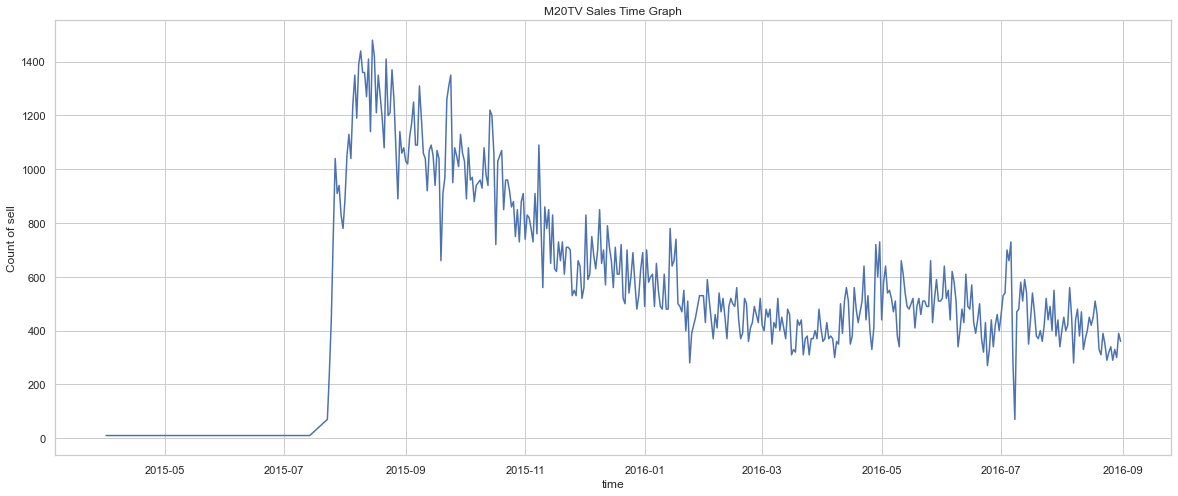

In [16]:
for i in range(len(Top5_TV)):
    for j in range(len(M)):
        model_name =  "M" + str(j)
        if(M_Total[j] == Top5_TV[i]):
            print(model_name)
            
            plt.figure(figsize=(20,8))
            plt.title(model_name + 'TV Sales Time Graph')
            plt.ylabel('Count of sell')
            plt.xlabel('time')
            plt.plot(pd.to_datetime(M[j]['Date']), M[j]['Count'])
            plt.show()
